COLLECTING DATA:
The following data used is imported from yahoo finance website.The data is collected from the date 2015-01-01 to 2023-10-16.The assets include includes stocks, precious metals and cryptocurrency.

In [4]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import yfinance as yf
yf.pdr_override()


s_date = "2015-01-01"
e_date = "2023-10-16"
sbl = ['MSFT','GOOGL','SMME','TSLA','AMZN','GME','FUBO','KEGS','BTC-USD']
data = wb.get_data_yahoo(sbl,start=s_date, end=e_date)['Close']
data=data.dropna()
print(data)

[*********************100%%**********************]  9 of 9 completed
                  AMZN       BTC-USD   FUBO      GME       GOOGL     KEGS  \
Date                                                                        
2019-03-27   88.285004   4087.066162   9.99   2.5725   58.900501  0.00040   
2019-03-28   88.670998   4069.107178   9.99   2.5475   58.613499  0.00040   
2019-03-29   89.037498   4098.374512   9.99   2.5400   58.844501  0.00040   
2019-04-01   90.709503   4158.183105  10.00   2.5925   59.949001  0.00040   
2019-04-02   90.698997   4879.877930   7.10   2.5250   60.277000  0.00040   
...                ...           ...    ...      ...         ...      ...   
2023-10-09  128.259995  27583.677734   2.35  15.4000  138.419998  0.00005   
2023-10-10  129.479996  27391.019531   2.51  16.0000  138.059998  0.00005   
2023-10-11  131.830002  26873.320312   2.54  15.8200  140.550003  0.00010   
2023-10-12  132.330002  26756.798828   2.38  15.0900  138.970001  0.00010   
2023-10

**GRAPH: Stock price data during the time period selected**

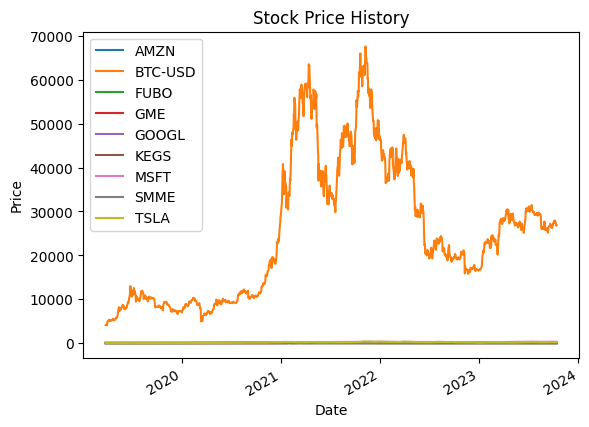

In [5]:
close = data
a=close.plot(title='Stock Price History')
a.set_xlabel('Date')
a.set_ylabel('Price')
plt.show()

**Graph: Percent change in returns for selected stocks.**

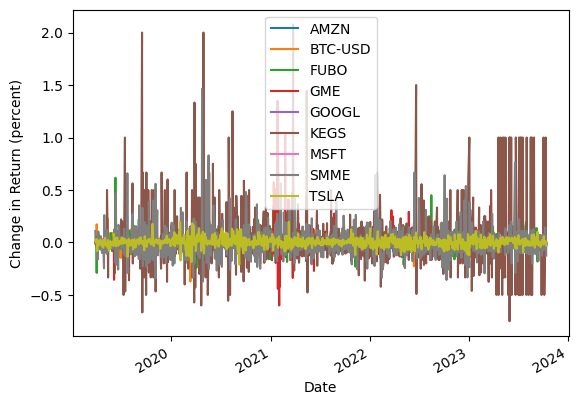

In [6]:
returns=close.pct_change()
p=returns.plot(ylabel='Change in Return (percent)')

<Axes: xlabel='Date'>

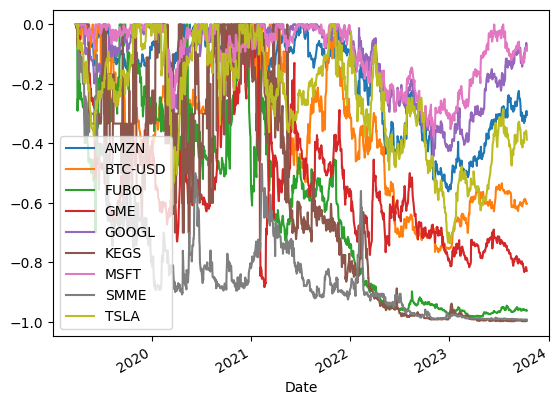

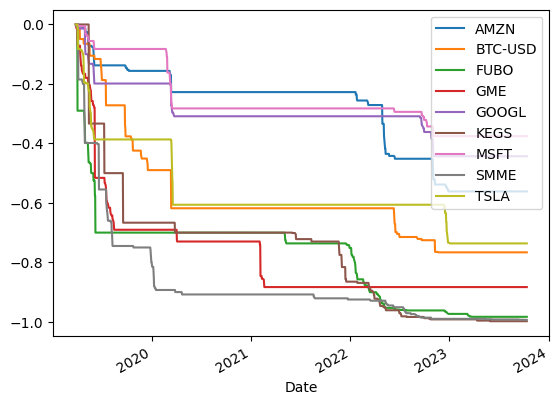

In [7]:
#Case of some disaster or tragedy
R = data.cummax()
draw_down = data/R - 1.0
max_draw_down = draw_down.cummin()
draw_down.plot()
max_draw_down.plot()

**Number of simulations selection and intialization of arrays for saving the information.**

In [8]:
no_of_simltn=15000
no_of_sbl=len(sbl)
wts_arr=np.zeros((no_of_simltn,no_of_sbl))
returns_arr=np.zeros(no_of_simltn)
volatilities_arr=np.zeros(no_of_simltn)
sharpe_ratios_arr=np.zeros(no_of_simltn)

In [9]:
for i in range(no_of_simltn):
  wts=np.array(np.random.random(no_of_sbl))
  wts=wts/np.sum(wts)
  wts_arr[i]=wts
  returns_arr[i]=np.sum(returns.mean()*252*wts)
  volatilities_arr[i]=np.sqrt(np.dot(wts.T,np.dot(252*returns.cov(),wts)))
  sharpe_ratios_arr[i]=(returns_arr[i]-0.0486)/volatilities_arr[i]

In [10]:
coll_data=[returns_arr,volatilities_arr,sharpe_ratios_arr,wts_arr]
coll_df=pd.DataFrame(coll_data).T
coll_df.columns=['Returns','Volatility','Sharpe','Weights']
coll_df

,Returns,Volatility,Sharpe,Weights
0,1.544236,0.822364,1.818703,"[0.08206682032541769, 0.1367475148166551, 0.16..."
1,1.388121,0.778338,1.721002,"[0.009456674161448029, 0.13405600726351893, 0...."
2,1.807607,0.933598,1.884116,"[0.08461811921530936, 0.18310182139192877, 0.1..."
3,1.303905,0.704109,1.782827,"[0.1355435621123327, 0.03718629329169925, 0.15..."
4,2.034767,1.201949,1.652456,"[0.03825664553358268, 0.10942857589000062, 0.0..."
...,...,...,...,...
14995,0.955354,0.660295,1.373255,"[0.1369411966033953, 0.08067647091453439, 0.15..."
14996,0.733541,0.71197,0.962036,"[0.07047813214492547, 0.2786431762055352, 0.13..."
14997,1.947997,1.025085,1.852916,"[0.17269124615706488, 0.1808203290736929, 0.01..."
14998,0.939773,0.689299,1.292868,"[0.040308197912211796, 0.028993855382757866, 0..."


In [11]:
coll_df=coll_df.infer_objects()

In [12]:
b=coll_df.loc[coll_df['Sharpe'].idxmax()]
print("*"*40)
print("Maximum Sharpe-Ratio")

print(b)
print(b['Weights'])
print("*"*40)
c=coll_df.loc[coll_df['Volatility'].idxmin()]
print("Minimum Volatility")
print(c)
print(c['Weights'])
print("*"*40)
d=coll_df.loc[coll_df['Volatility'].idxmax()]
print("MAXIMUM VOLATILITY")
print(d)
print(d['Weights'])
print("*"*40)
print("Maximum Returns")
print("*"*40)
e=coll_df.loc[coll_df['Returns'].idxmax()]
print(e)
print(e['Weights'])
print("*"*40)


****************************************
Maximum Sharpe-Ratio
Returns                                                1.174392
Volatility                                              0.54776
Sharpe                                                 2.055265
Weights       [0.07383912729274555, 0.22807667795093034, 0.0...
Name: 13560, dtype: object
[0.07383913 0.22807668 0.03550096 0.0996124  0.01280132 0.0948545
 0.17535435 0.04261576 0.2373449 ]
****************************************
Minimum Volatility
****************************************
Returns                                                 0.35831
Volatility                                             0.314416
Sharpe                                                 0.985032
Weights       [0.0324661789713179, 0.052241036387361474, 0.0...
Name: 1864, dtype: object
[0.03246618 0.05224104 0.0908712  0.00300628 0.32297259 0.00179401
 0.38643838 0.02453611 0.08567421]
****************************************
MAX VOLATILITY
*************

Text(0.5, 1.0, 'Portfolio Returns Vs. Risk')

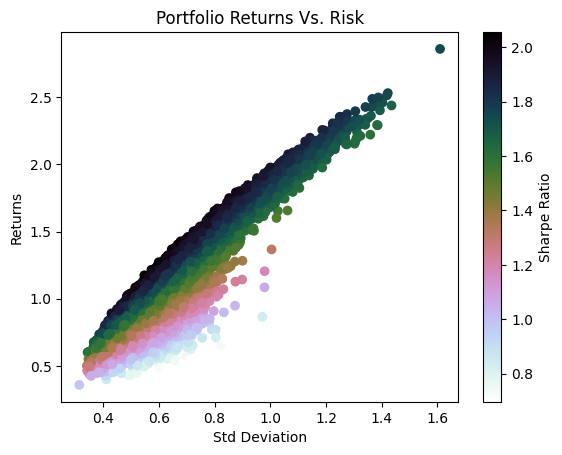

In [15]:
%matplotlib inline
plt.scatter(y=coll_df['Returns'] ,x=coll_df['Volatility'],c=coll_df['Sharpe'],cmap='cubehelix_r')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Std Deviation')
plt.ylabel('Returns')
plt.title('Portfolio Returns Vs. Risk')

In [16]:
from scipy.optimize import linprog
from scipy import optimize

In [17]:
def Max_returns(MeanReturns, PortfolioSize):

    x = (np.multiply(-1,MeanReturns))
    y = np.ones([PortfolioSize,1]).T
    z=[1]
    ans = linprog(x, y_ub = y, z_ub = z, bounds = (0,1), method = 'highs')

    return ans

In [18]:
m_ret_res=Max_returns(close.pct_change().mean(),no_of_sbl)
res_2=np.sum(m_ret_res.x*close.pct_change().mean())

In [19]:
def Min_Risk(CovarReturns, PortfolioSize):

    def  f(x, CovarReturns):
        ans = np.matmul(np.matmul(x, CovarReturns), x.T)
        return ans
    def constraint_Eq(x):
        A=np.ones(x.shape)
        b=1
        ans = np.matmul(A,x.T)-b
        return ans

        
    xi=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraint_Eq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xi])

    ans = optimize.minimize (f, x0 = xi, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)
    return ans

In [20]:
ris_res=Min_Risk(close.pct_change().cov(),no_of_sbl)

In [21]:
res_1=np.sum(close.pct_change().mean().T*ris_res.x)
res_1*252

1.1540006381590209

In [22]:
ris_res.x.shape

(9,)

In [23]:
def Min_RiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):

    def  f(x,CovarReturns):

        func = np.matmul(np.matmul(x,CovarReturns ), x.T)
        return func

    def constraint_Eq(x):
        AEq=np.ones(x.shape)
        bEq=1
        ans = np.matmul(AEq,x.T)-bEq
        return ans

    def constraint_Ineq(x, MeanReturns, R):
        AIneq = np.array(MeanReturns)
        bIneq = R
        ans= np.matmul(AIneq,x.T) - bIneq
        return ans


    xi=np.repeat(0.1, PortfolioSize)
    const = ({'type': 'eq', 'fun':constraint_Eq},
            {'type':'ineq', 'fun':constraint_Ineq, 'args':(MeanReturns,R) })
    lb = 0
    ub = 1
    bounds = tuple([(lb,ub) for x in xi])

    ans = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                        x0 = xi,   bounds = bounds, constraints = const, tol = 10**-3)

    return  ans

In [24]:
incre = 0.00001
lower_l=res_1
upper_l=res2
x_Opt =[]
minRiskPoint = []
expPortfolioReturnPoint =[]


In [25]:
while (lower_l < higher_l):
    res_3 = Min_RiskConstr(close.pct_change().mean(), close.pct_change().cov(),no_of_sbl, lower_l)
    x_Opt.append(res_3.x)
    expPortfolioReturnPoint.append(lower_l)
    lower_l = lower_l+incre

c:\Users\Akshant Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
c:\Users\Akshant Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
c:\Users\Akshant Prakash\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is l

KeyboardInterrupt: 

In [ ]:
x_Opt_Array = np.array(x_Opt)
print(x_Opt_Array[-1])

[0.04386867 0.04977192 0.5325661  0.03063566 0.14195866 0.04040315
 0.04518631 0.03114816 0.08503133]


In [ ]:

min_Risk = np.diagonal(np.matmul((np.matmul(x_Opt_Array,close.pct_change().cov())),np.transpose(x_Opt_Array)))
risk =   np.sqrt(min_Risk*252)
ret = 252*np.array(expPortfolioReturnPoint)

print("Size of the  efficient set:", x_Opt_Array.shape )
print("Optimal weights of the efficient set portfolios: \n", x_Opt_Array)
print("Annualized Risk and Return of the efficient set portfolios: \n", np.c_[risk, ret])

Size of the  efficient set: (178, 9)
Optimal weights of the efficient set portfolios: 
 [[0.10887254 0.11068167 0.13138701 ... 0.10960852 0.10362749 0.11421555]
 [0.10887294 0.11068235 0.1313908  ... 0.10960904 0.10362715 0.11421671]
 [0.10887335 0.11068302 0.13139458 ... 0.10960957 0.1036268  0.11421787]
 ...
 [0.04388341 0.04978623 0.53246078 ... 0.04520098 0.03116334 0.08503984]
 [0.04387604 0.04977908 0.53251342 ... 0.04519364 0.03115575 0.08503559]
 [0.04386867 0.04977192 0.5325661  ... 0.04518631 0.03114816 0.08503133]]
Annualized Risk and Return of the efficient set portfolios: 
 [[0.25629866 0.33899552]
 [0.25630114 0.34151552]
 [0.25630364 0.34403552]
 [0.25630613 0.34655552]
 [0.25630862 0.34907552]
 [0.25631111 0.35159552]
 [0.2563136  0.35411552]
 [0.2563161  0.35663552]
 [0.25631855 0.35915552]
 [0.25632108 0.36167552]
 [0.25632357 0.36419552]
 [0.25632606 0.36671552]
 [0.25632855 0.36923552]
 [0.25633104 0.37175552]
 [0.25633353 0.37427552]
 [0.25633602 0.37679552]
 [0.25